In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#Create Data
X_numpy , y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)

In [4]:
print(X_numpy.shape)
print(y_numpy.shape)

(100, 1)
(100,)


In [5]:
type(X_numpy)

numpy.ndarray

In [8]:
#cast to float tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [9]:
type(X)

torch.Tensor

In [11]:
print(X.shape)
print(y.shape)

torch.Size([100, 1])
torch.Size([100])


In [12]:
y= y.view(y.shape[0], 1)

In [13]:
y

tensor([[-126.2492],
        [  50.9288],
        [  63.1546],
        [   6.0547],
        [  -5.7295],
        [  -2.7519],
        [  58.7036],
        [  53.8136],
        [ -95.3411],
        [  24.6481],
        [ -59.4170],
        [ -73.4235],
        [-104.1627],
        [  31.8077],
        [ 171.1535],
        [ -67.7520],
        [ 141.4677],
        [ -24.3676],
        [  -2.1124],
        [ -32.5958],
        [ -29.4151],
        [ -37.8715],
        [-101.8983],
        [  46.4129],
        [-181.3484],
        [ -31.7740],
        [  24.1315],
        [ 163.9438],
        [  10.7737],
        [  37.3589],
        [   0.9804],
        [-120.8857],
        [ 138.1994],
        [   9.2027],
        [ -16.2069],
        [  33.2171],
        [ -45.6170],
        [  -1.7776],
        [-105.5628],
        [   5.2639],
        [  89.5979],
        [ 146.1030],
        [ -77.7870],
        [  -3.8089],
        [  60.8120],
        [ -97.2027],
        [  -1.1599],
        [ -43

In [14]:
n_samples, n_feature = X.shape

In [16]:
print(n_samples)
print(n_feature)

100
1


In [17]:
#create model
#linear model f = wx + b
input_size = n_feature
output_size = 1

model = nn.Linear(input_size, output_size)

In [18]:
#Loss and the optimizer
learning_rate = 0.01

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Epoch : 10, Loss : 3991.5549
Epoch : 20, Loss : 2814.5662
Epoch : 30, Loss : 2012.1930
Epoch : 40, Loss : 1465.0844
Epoch : 50, Loss : 1091.9547
Epoch : 60, Loss : 837.4267
Epoch : 70, Loss : 663.7675
Epoch : 80, Loss : 545.2603
Epoch : 90, Loss : 464.3741
Epoch : 100, Loss : 409.1556


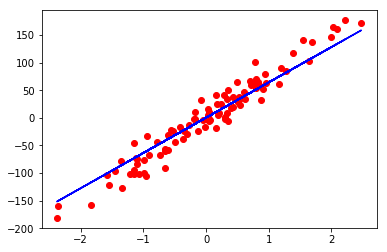

In [20]:
##Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward propagation and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #Backward propagation and update
    loss.backward()
    optimizer.step()
    
    #zero grad before new step
    optimizer.zero_grad()
    
    if (epoch +1) % 10 == 0:
        print(f"Epoch : {epoch+1}, Loss : {loss.item():.4f}")
        
        
#Plot prediction
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()